<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری سوم درس سیستم های چندرسانه ای </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import cv2
import numpy as np
from scipy.fftpack import dct, idct
from matplotlib import pyplot as plt

In [2]:
def Show_Images(img_list, label, fig_size):
    
    img_num = len(img_list)
    if img_num == 1:
        plt.figure(figsize=fig_size) 
        plt.imshow(img_list[0], cmap="gray")
        plt.title("{}\n{}".format(label[0], img_list[0].shape[0:2]))
    
    else:
        fig, ax = plt.subplots(1, img_num, figsize=fig_size)
        for i in range(img_num):
            ax[i].imshow(img_list[i], cmap="gray")
            ax[i].set_title("{}\n{}".format(label[i], img_list[i].shape[0:2]))
        
    plt.show()

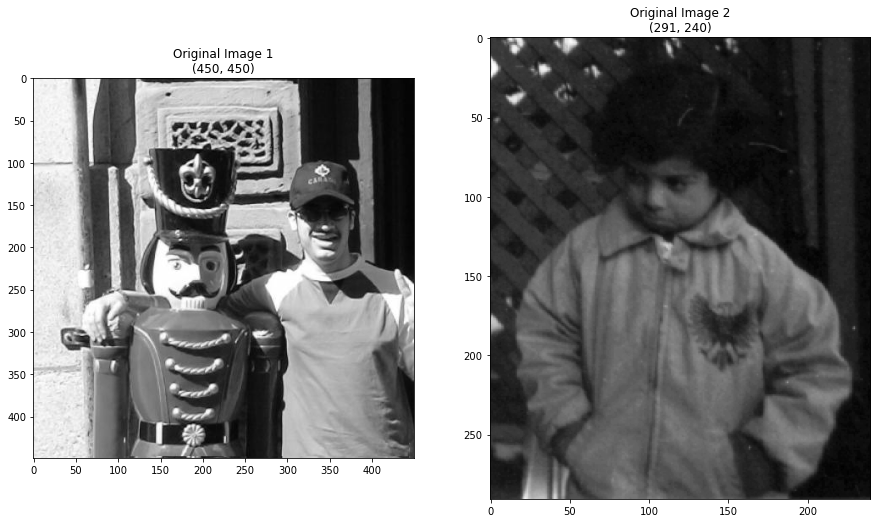

In [3]:
img_path = r'Pics\2.tif'
src_img1 = cv2.imread(img_path)
src_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2GRAY)

img_path = r'Pics\1.tif'
src_img2 = cv2.imread(img_path)
src_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2GRAY)

Show_Images(img_list=[src_img1, src_img2], 
            label=['Original Image 1', 'Original Image 2'], 
            fig_size=(15,15))

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 1 )
</span>
</h3> 
</div>

In [4]:
def Hist_Median(src_img):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    pdf = [0 for i in range(256)]
    
    for i in range(height):
        for j in range(width):
            pdf[src_img[i][j]] += 1

    cdf = np.cumsum(pdf)
    Sum = sum(pdf)
    cdf = [i/Sum for i in cdf]
    
    T = []
    threshold = 0.25
    while threshold < 1:
        for i in range(256):
            if cdf[i] >= threshold: T.append(i); break 
                
        threshold += 0.25
    
    # Show the histogram of image with matplotlib
    plt.figure(figsize=(15, 5)) 
    plt.bar(range(256), pdf, color = '#4842f5')
    plt.ylabel('Frequency', fontsize=15)
    plt.xlabel('Intensity levels', fontsize=15)
    plt.title('PDF', fontsize=15)
    
    min_ylim, max_ylim = plt.ylim()
    for i in range(3):
        plt.axvline(T[i], color='r', linestyle='dashed')
        plt.text(T[i], max_ylim * 0.8, 'T{}: {}'.format(i,T[i]), color='r', rotation=90, backgroundcolor='1')

    return T

In [5]:
def Median_Quantization(src_img, T):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_img = [[0 for i in range(width)] for i in range(height)]
    
    for i in range(height):
        for j in range(width):
            
            if src_img[i][j] < T[0]:
                new_img[i][j] = T[0] / 2
                
            elif src_img[i][j] >= T[-1]:
                new_img[i][j] = (255 + T[-1]) / 2
            
            else:
                for k in range(0, len(T)-1):

                    if src_img[i][j] >= T[k] and src_img[i][j] < T[k+1]:
                        new_img[i][j] = (T[k+1] + T[k]) / 2
                        break
            
    new_img = np.array(np.round(new_img))
    new_img = new_img.astype(np.uint8)
    
    return new_img

In [6]:
def Simple_Quantization(src_img):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_img = [[0 for i in range(width)] for i in range(height)]
    
    for i in range(height):
        for j in range(width):
            new_img[i][j] = np.floor(src_img[i][j] / 64) * 64
                
    new_img = np.array(new_img)
    new_img = new_img.astype(np.uint8) 
    
    return new_img

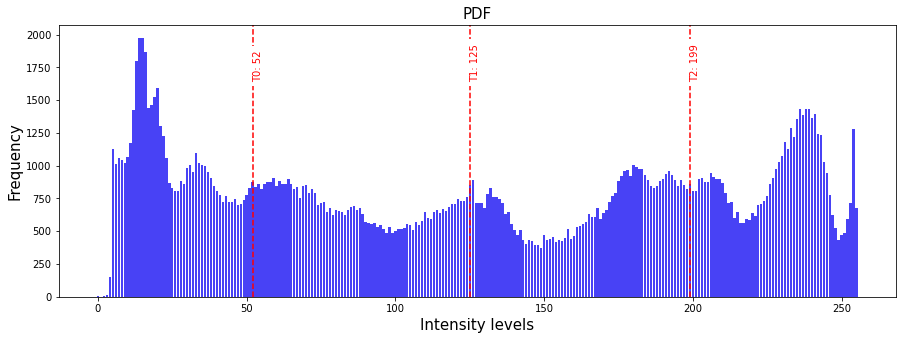

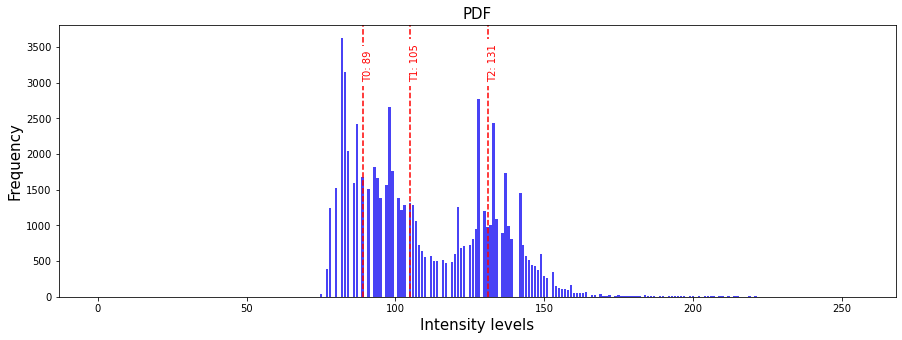

In [7]:
T1 = Hist_Median(src_img1)
T2 = Hist_Median(src_img2)

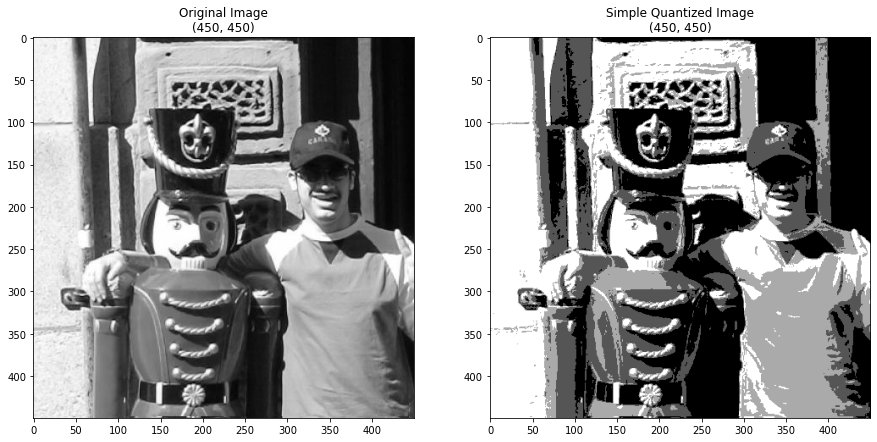

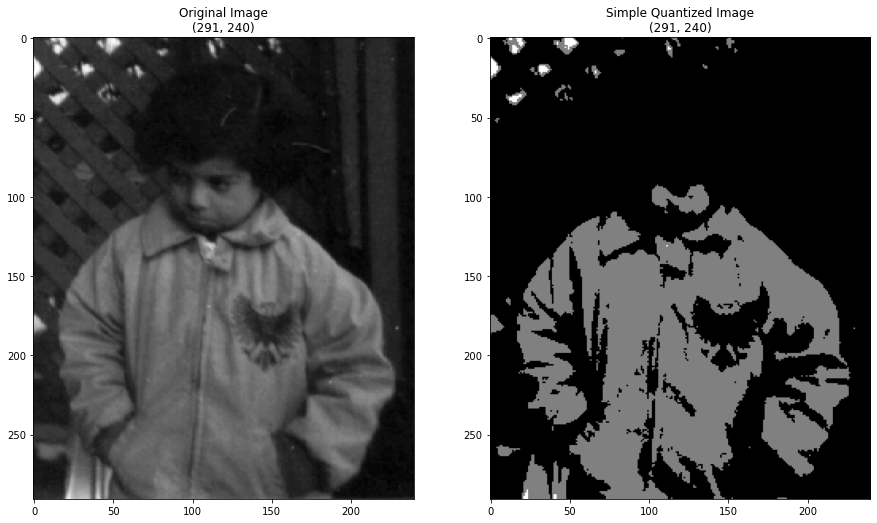

In [8]:
new_img1 = Simple_Quantization(src_img1)
new_img2 = Simple_Quantization(src_img2)

# Show the image with matplotlib
Show_Images(img_list=[src_img1, new_img1], 
        label=['Original Image', 'Simple Quantized Image'], 
        fig_size=(15,15))

# Show the image with matplotlib
Show_Images(img_list=[src_img2, new_img2], 
        label=['Original Image', 'Simple Quantized Image'], 
        fig_size=(15,15))

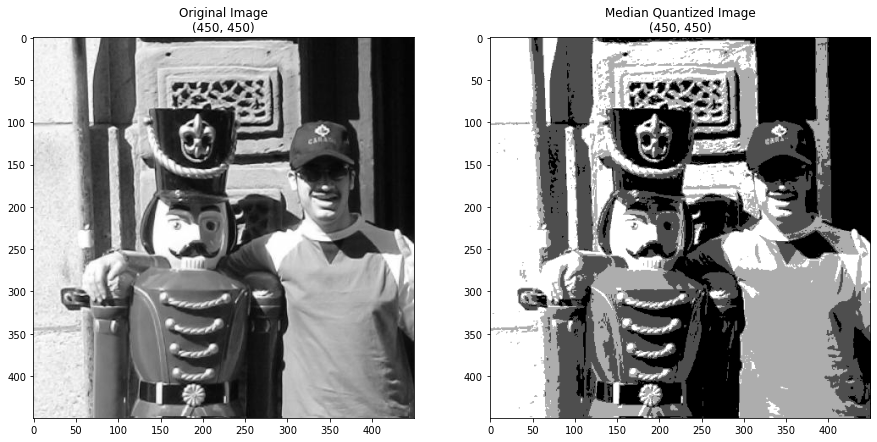

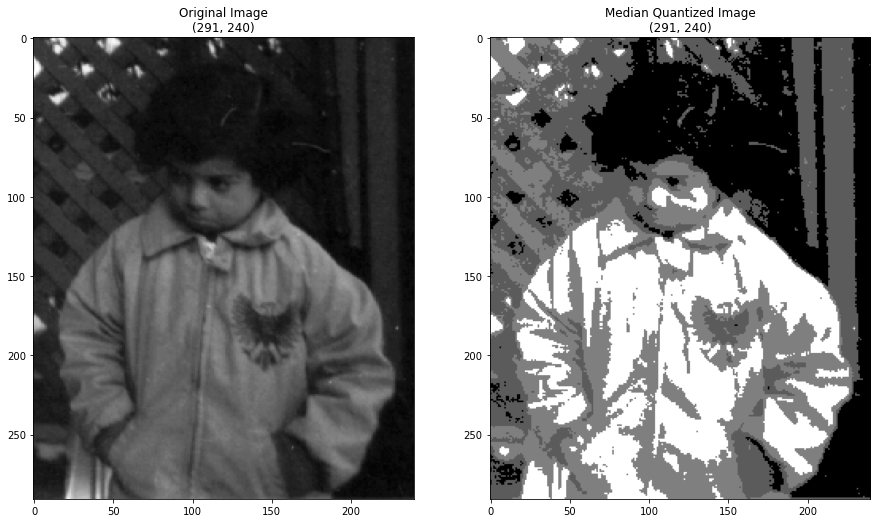

In [9]:
new_img1 = Median_Quantization(src_img1, T1)
new_img2 = Median_Quantization(src_img2, T2)

# Show the image with matplotlib
Show_Images(img_list=[src_img1, new_img1], 
        label=['Original Image', 'Median Quantized Image'], 
        fig_size=(15,15))

# Show the image with matplotlib
Show_Images(img_list=[src_img2, new_img2], 
        label=['Original Image', 'Median Quantized Image'], 
        fig_size=(15,15))

In [10]:
def Hist_Median(src_img, n):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    pdf = [0 for i in range(256)]
    
    for i in range(height):
        for j in range(width):
            pdf[src_img[i][j]] += 1

    cdf = np.cumsum(pdf)
    Sum = sum(pdf)
    cdf = [i/Sum for i in cdf]
    
    range_num = 2 ** n
    
    T = []
    threshold = 1/range_num
    while threshold < 1:
        for i in range(256):
            if cdf[i] >= threshold: T.append(i); break 
                
        threshold += 1/range_num
    
    # Show the histogram of image with matplotlib
    plt.figure(figsize=(15, 5)) 
    plt.bar(range(256), pdf, color = '#4842f5')
    plt.ylabel('Frequency', fontsize=15)
    plt.xlabel('Intensity levels', fontsize=15)
    plt.title('PDF', fontsize=15)
    
    min_ylim, max_ylim = plt.ylim()
    for i in range(len(T)):
        plt.axvline(T[i], color='r', linestyle='dashed')
        plt.text(T[i], max_ylim * 0.8, 'T{}: {}'.format(i,T[i]), color='r', rotation=90, backgroundcolor='1')

    return T

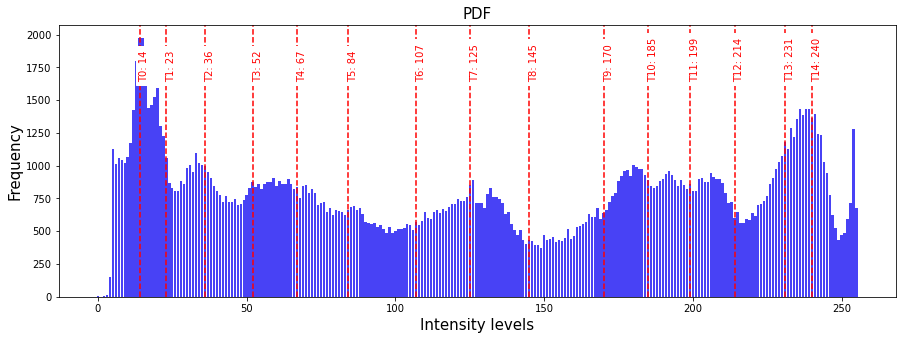

In [11]:
T1 = Hist_Median(src_img1, 4)

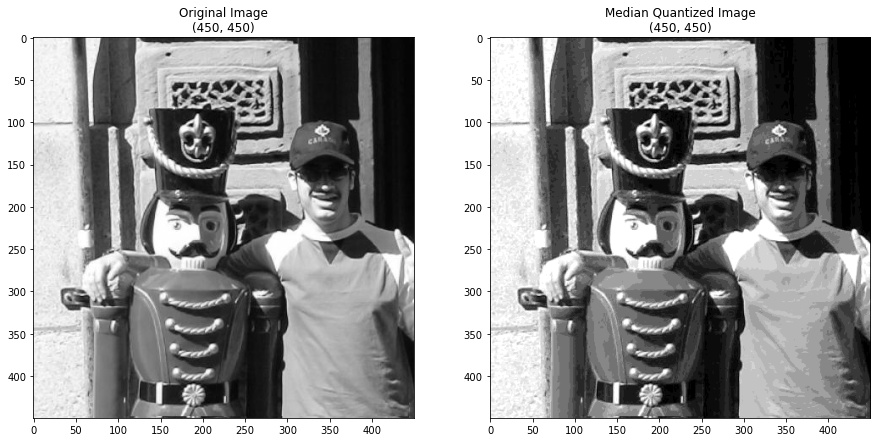

In [12]:
new_img1 = Median_Quantization(src_img1, T1)

# Show the image with matplotlib
Show_Images(img_list=[src_img1, new_img1], 
        label=['Original Image', 'Median Quantized Image'], 
        fig_size=(15,15))

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 2 )
</span>
</h3> 
</div>

In [13]:
def PSNR(imageA, imageB):    
    mse = (np.square(imageA.astype(int) - imageB.astype(int))).mean() 
    return 100 if mse == 0 else 10 * np.log10((255 * 255) / mse)

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

In [14]:
def HW3_DCT(src_img, k, t):
    
    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_height, new_width  = height, width
    
    if height % k != 0:
        new_height = k - (height % k) + height  
        
    if width  % k != 0:
        new_width  = k - (width  % k) + width

    dim = (new_width, new_height)

    # Resize image
    if (height % k) or (width  % k):   
        src_img = cv2.resize(src_img, dim, interpolation = cv2.INTER_CUBIC)

    new_img = [[0 for i in range(new_width)] for i in range(new_height)]
    
    counter = 0
    for i in range(0, new_height, k):
        for j in range(0, new_width, k):
            DCT = dct2(src_img[i:i+k, j:j+k])
            counter += len(DCT[abs(DCT) < t])
            DCT[abs(DCT) < t] = 0
            IDCT = idct2(DCT)
            for m in range(i, i+k):
                for n in range(j, j+k):
                    new_img[m][n] = IDCT[m-i][n-j]
                    
    new_img = np.array(np.round(new_img))
    src_img = src_img.astype(np.float64)
    
    dif_img = abs(src_img - new_img)  
    zero_pe = counter * 100 / (height * width)
    
    return (src_img, new_img, dif_img, zero_pe)

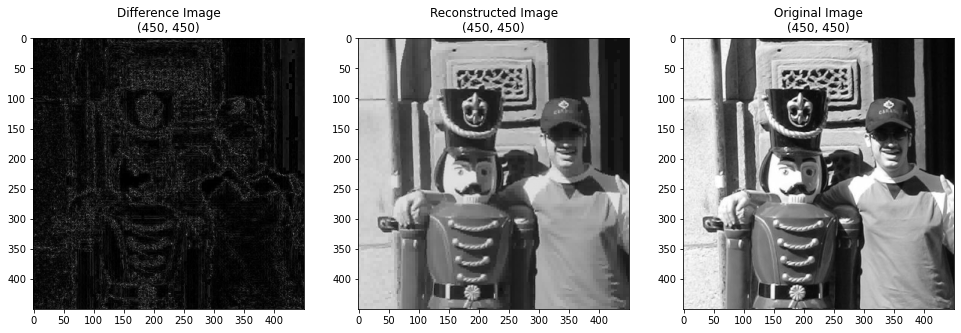

Zero DCTs = 93.39 %
My PSNR = 29.56
OpenCV PSNR = 29.56


In [15]:
src_img, new_img, dif_img, zero_pe = HW3_DCT(src_img1, 5, 50)

# Show the image with matplotlib
Show_Images(img_list=[dif_img, new_img, src_img], 
        label=['Difference Image', 'Reconstructed Image', 'Original Image'], 
        fig_size=(16.5,16.5))

print("\033[1m" + 'Zero DCTs = {} %'.format(np.round(zero_pe, 2)) + "\033[0m")
print("\033[1m" + 'My PSNR = {}'.format(np.round(PSNR(src_img, new_img), 2)) + "\033[0m")
print("\033[1m" + 'OpenCV PSNR = {}'.format(np.round(cv2.PSNR(src_img, new_img), 2)) + "\033[0m")

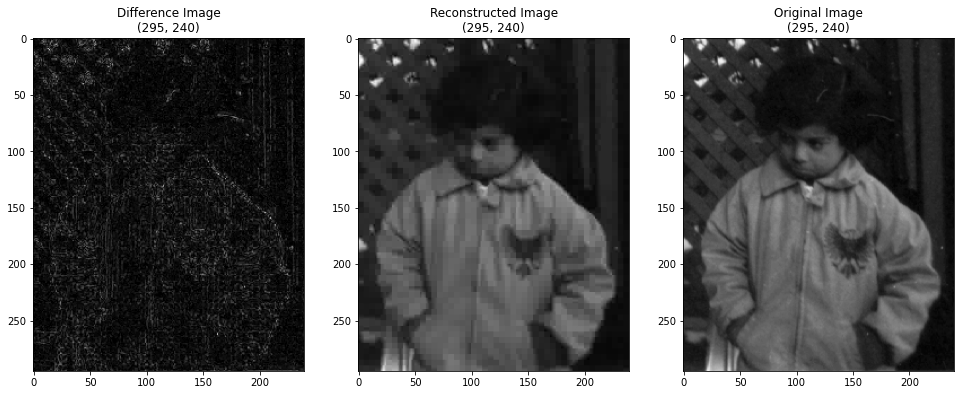

Zero DCTs = 95.59 %
My PSNR = 37.89
OpenCV PSNR = 37.89


In [16]:
src_img, new_img, dif_img, zero_pe = HW3_DCT(src_img2, 5, 20)

# Show the image with matplotlib
Show_Images(img_list=[dif_img, new_img, src_img], 
        label=['Difference Image', 'Reconstructed Image', 'Original Image'], 
        fig_size=(16.5,16.5))

print("\033[1m" + 'Zero DCTs = {} %'.format(np.round(zero_pe, 2)) + "\033[0m")
print("\033[1m" + 'My PSNR = {}'.format(np.round(PSNR(src_img, new_img), 2)) + "\033[0m")
print("\033[1m" + 'OpenCV PSNR = {}'.format(np.round(cv2.PSNR(src_img, new_img), 2)) + "\033[0m")